In [ ]:
#Linear Regression assumptions

#The regression model is linear in parameters
#The mean of residuals is zero

#Residuals

#Homoscedasticity of residuals or equal variance
#No autocorrelation of residuals
#The X variables and residuals are uncorrelated
#The number of observations must be greater than number of Xs
#The variability in X values is positive
#The regression model is correctly specified
#No perfect multicollinearity
#Normality of residuals

In [ ]:
Learning algorithms

Linear Algos 

Non -linear Algos

In [ ]:
y = wx + c

#calculate value of w such that cost function(Error function/loss function) is min.

#diff the y eqn. and equate it to 0 - Scalability issues with larger weights

#Simple linear regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
path = os.getcwd() + '\LinearReg_1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

In [3]:
data

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
5,8.3829,11.88600
6,7.4764,4.34830
7,8.5781,12.00000
8,6.4862,6.59870
9,5.0546,3.81660


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


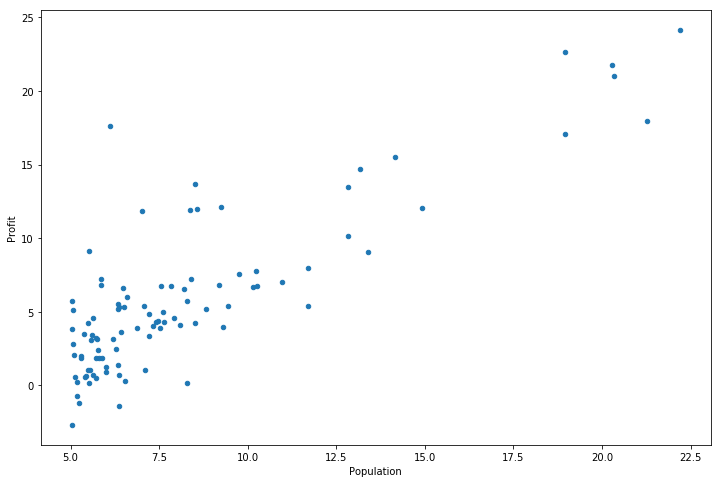

In [5]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

In [ ]:
#calculate weights

In [6]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [7]:
data.insert(0, 'Ones', 1)


In [8]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [9]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [10]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [11]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [12]:
theta

matrix([[0, 0]])

In [13]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [14]:
computeCost(X, y, theta)

32.072733877455676

In [15]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [16]:
alpha = 0.001
iters = 1000

In [17]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-0.57607021,  0.8595327 ]])

In [18]:
computeCost(X, y, g)

5.4802693320203222

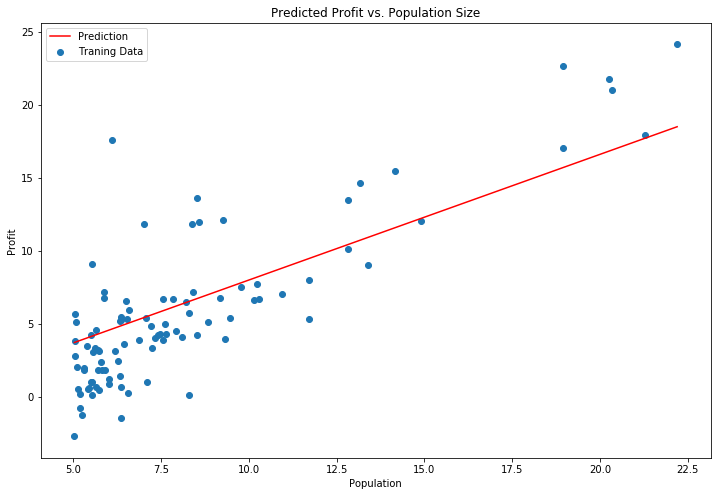

In [19]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

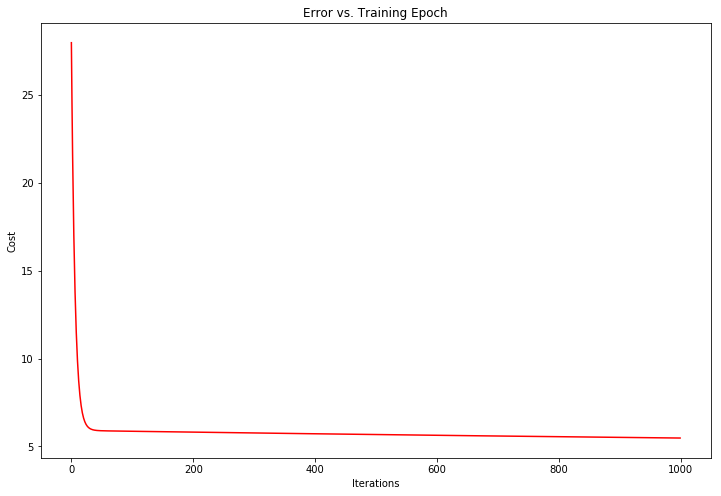

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

In [21]:
path = os.getcwd() + '\LinearReg_2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()


,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [22]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [23]:
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

0.18313435994592289

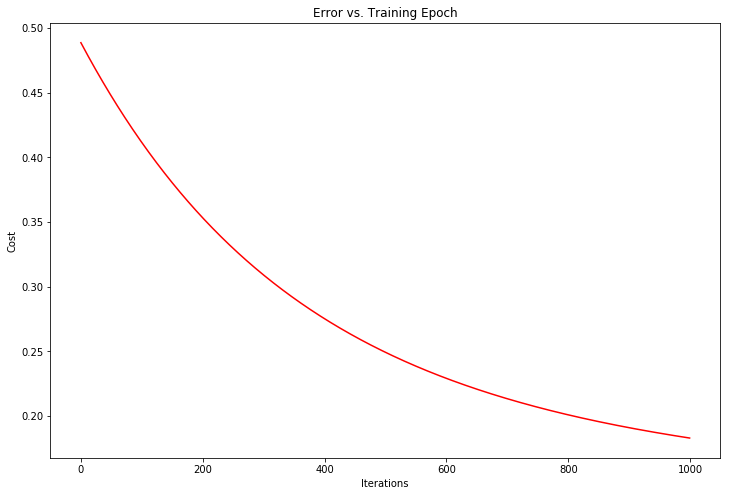

In [24]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

In [25]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
type(model)

sklearn.linear_model.base.LinearRegression

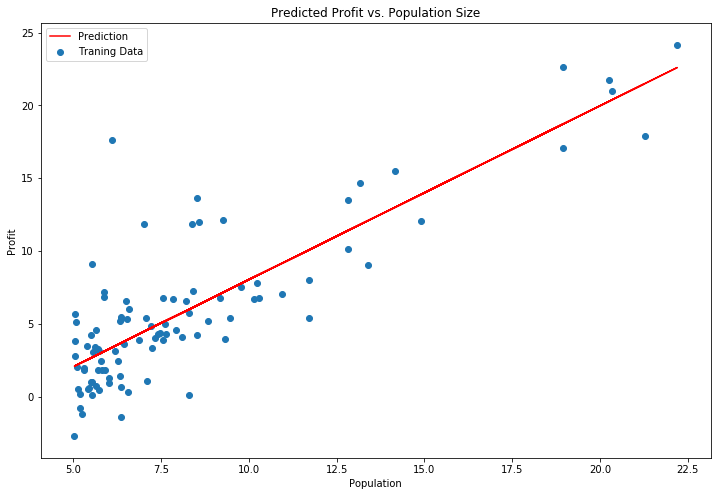

In [27]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

In [ ]:
sklearn

In [ ]:
Linear Reg ()

Ridge, lasso, elastic net - regularised

Logistic Reg

Decision Tress (bagging (RF), boosting (GBM, xgboost), CART)

Neural network - multi layer perceptron

K-means clustering

PCA (dimensional reduction )

Recommendation engines (collaborative filtering (user-item, cf) (item-item cf) | content based rec sys)

SVM

Evaluation metrics

Linear ALgebra